<a href="https://colab.research.google.com/github/fakhar-iqbal/Machine_Learning_Fundamentals/blob/main/LinearAlgebra_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Eigen Decomposition**

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
v = np.array([1,3])
v

array([1, 3])

In [3]:
#plot vectors

def plot_vectors(vectors, colors):
  """
  plot onee or more vectors in 2d plane, specifying a color for each.

  Arguments
  ----------
  vectors: list of lists or arrays
          coordinates of vectors to plot. for ex [[1,2],[3,4]]
          contains two vectors to plot [1,2] [3,4]

  colors: list
         colors of vectors. for instance ['red','blue'] will display first vector in red and second in blue.

  example:
  plot_vectors([[1,2],[3,4]],['red','blue'])

  """

  plt.figure()
  plt.axvline(x=0,color='lightgrey')
  plt.axhline(y=0,color='lightgrey')

  for i in range(len(vectors)):
    x = np.concatenate([[0,0],vectors[i]])
    plt.quiver([x[0]],[x[1]],[x[2]],[x[3]],
               angles='xy',scale_units='xy',scale=1,color=colors[i],)


(-1.0, 5.0)

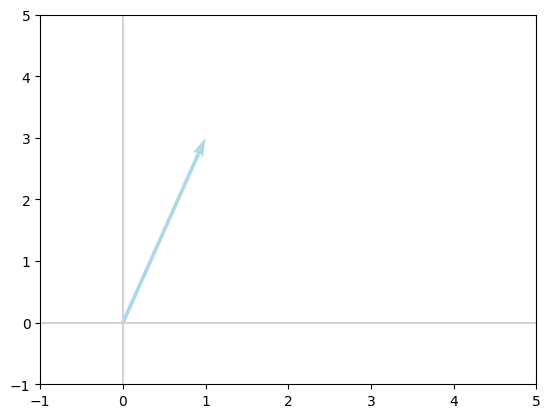

In [4]:
plot_vectors([v],['lightblue'])

plt.xlim(-1,5)
plt.ylim(-1,5)


(-2.0, 15.0)

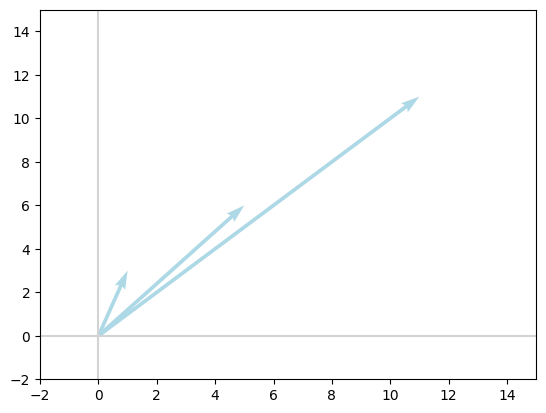

In [5]:
plot_vectors([v,[5,6],[11,11]],['lightblue','lightblue','lightblue'])
plt.xlim(-2,15)
plt.ylim(-2,15)

In [6]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [7]:
Iv = np.dot(I,v)
Iv

array([1, 3])

In [8]:
#matrix flipping over x-axis

E = np.array([[1,0],[0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [9]:
np.dot(E,v)

array([ 1, -3])

(-4.0, 4.0)

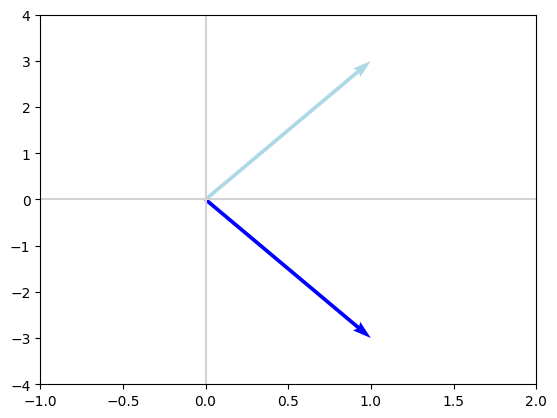

In [10]:
plot_vectors([v,np.dot(E,v)],['lightblue','blue'])
plt.xlim(-1,2)
plt.ylim(-4,4)

In [11]:
#flipping over y-axis
F = np.array([[-1,0],[0,1]])
F

array([[-1,  0],
       [ 0,  1]])

In [12]:
Fv = np.dot(F,v)
Fv

array([-1,  3])

(-4.0, 4.0)

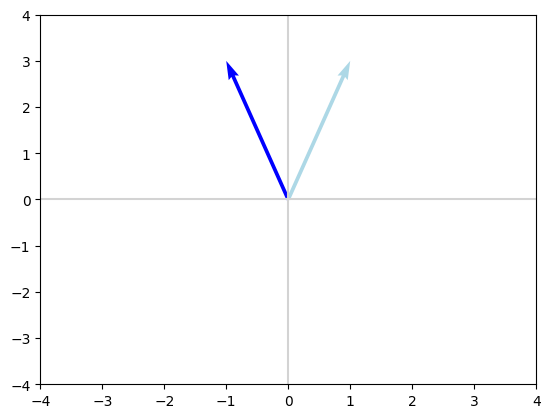

In [13]:
plot_vectors([Fv,v],['blue','lightblue'])
plt.xlim(-4,4)
plt.ylim(-4,4)

###Applying a flipping matrix to vectors is an example of AFFINE transformation.
###A change in geometry that may adjust distances or angles between vectprs, but preseves parrallelism in them.

###other common affine transormations include:
###* Scaling (changing tge length of vectors)
###* SHearing
###* Rotation

## A single matrix can apply multiple affine transformations simultaneously.
## flipping over an axis and rotate over 45 dgrees

In [14]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [15]:
Av = np.dot(A,v)
Av

array([11, -4])

(-8.0, 4.0)

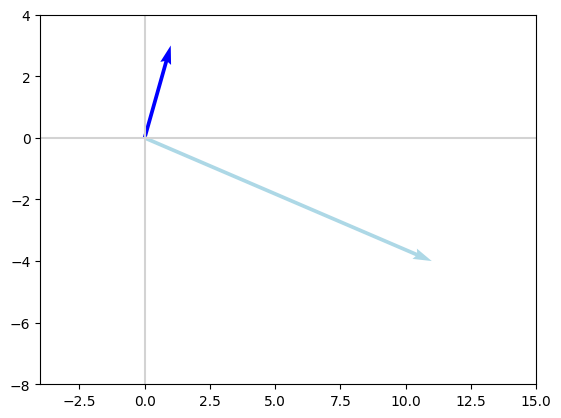

In [16]:
plot_vectors([v,Av],['blue','lightblue'])
plt.xlim(-4,15)
plt.ylim(-8,4)

##we can concatinate several vectors together into a matrix.

In [17]:
v = np.matrix([1,3])

In [18]:
v

matrix([[1, 3]])

In [19]:
v3 = np.array([-3,-1])
v4 = np.array([-1,1])

In [20]:
#concatenate to make a matrix

V = np.concatenate((np.matrix(v).T,
                    np.matrix([2,1]).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)
V

matrix([[ 1,  2, -3, -1],
        [ 3,  1, -1,  1]])

In [21]:
IV = np.dot(I,V)

In [22]:
IV

matrix([[ 1,  2, -3, -1],
        [ 3,  1, -1,  1]])

In [23]:
I

array([[1, 0],
       [0, 1]])

In [24]:
AV = np.dot(A,V)
AV

matrix([[11,  2, -1,  5],
        [-4,  2, -4, -4]])

In [25]:
def vectorify(mtrx,col):
  return np.array(mtrx[:,col]).reshape(-1)

In [26]:
vectorify(V,0)

array([1, 3])

(-6.0, 6.0)

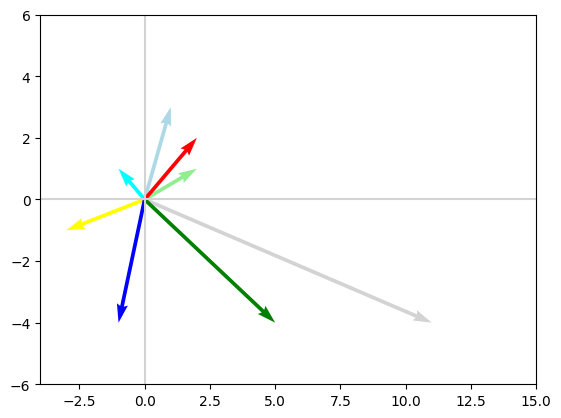

In [27]:
plot_vectors([vectorify(V,0),vectorify(V,1),vectorify(V,2),vectorify(V,3),
              vectorify(AV,0),vectorify(AV,1),vectorify(AV,2),vectorify(AV,3)],
             ['lightblue','lightgreen','yellow','cyan','lightgrey','red','blue','green'])

plt.xlim(-4,15)
plt.ylim(-6,6)

#**Eigen vectors and Eignvalues**

An eigenvector is a special vector v such that when it is transformed by some matrix, the prodcut Av, has the excact same direction.

An eigenvalue is a scalar that simply scales the eigenvector v such that the eq satisfies:
Av = lambda v



In [28]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

eig() returns:
* a vector of eigenvalues
* a matrix of eigenvectors

In [29]:
lambdas, V = np.linalg.eig(A)
lambdas,V

(array([ 1.37228132, -4.37228132]),
 array([[ 0.86011126, -0.76454754],
        [ 0.51010647,  0.64456735]]))

The matrix contains as many eigenvectors as there are columns in A

In [30]:
V #each column is a separate eigenvector

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With corresponding eigenvalue

In [31]:
lambdas

array([ 1.37228132, -4.37228132])

lets confirm Av=lambda.v

In [32]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [33]:
Av = np.dot(A,v)
Av

array([1.18031462, 0.70000958])

In [34]:
np.dot(A,v) == np.dot(lambdas[0],v)

array([ True,  True])

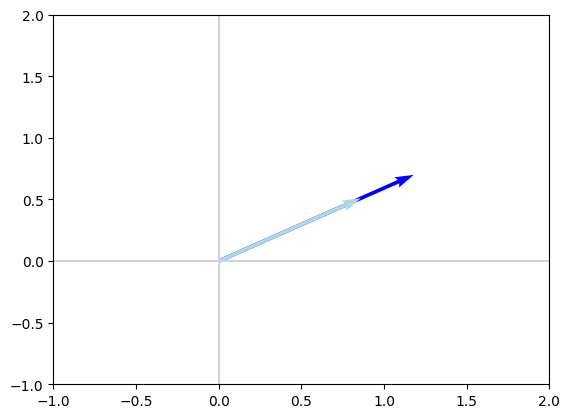

In [35]:
plot_vectors([Av,v],['blue','lightblue'])
plt.xlim(-1,2)
_=plt.ylim(-1,2)

In [36]:
v2  = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [37]:
Av2 = np.dot(A,v2)
Av2

array([ 3.34281692, -2.81822977])

(-4.0, 4.0)

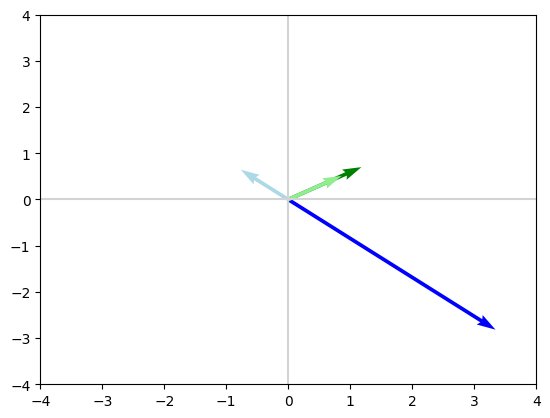

In [38]:
plot_vectors([Av2,v2,Av,v],['blue','lightblue','green','lightgreen'])
plt.xlim(-4,4)
plt.ylim(-4,4)

In [39]:
#pytorch implementation

A_pt= torch.tensor([[-1,4],[2,-2.]])
A_pt

tensor([[-1.,  4.],
        [ 2., -2.]])

In [40]:
L,V = torch.linalg.eig(A_pt)
Lr = L.real
Vr = V.real

In [41]:
v_p = Vr[:,0]
v_p

tensor([0.8601, 0.5101])

In [42]:
A_ptv = torch.matmul(A_pt,v_p)
A_ptv

tensor([1.1803, 0.7000])

(-1.0, 2.0)

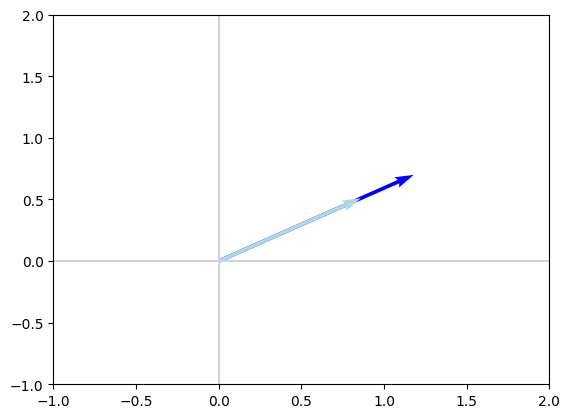

In [43]:
plot_vectors([A_ptv,v_p],['blue','lightblue'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [44]:
v_p2 = Vr[:,1]
v_p2

tensor([-0.7645,  0.6446])

In [45]:
A_vp2 = torch.matmul(A_pt,v_p2)
A_vp2

tensor([ 3.3428, -2.8182])

(-4.0, 3.0)

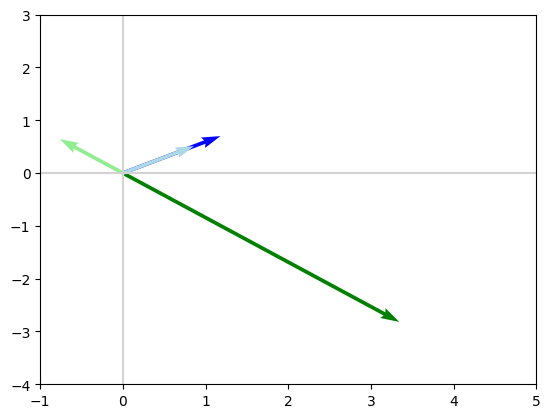

In [46]:
plot_vectors([A_vp2.numpy(),v_p2,A_ptv,v_p],['green','lightgreen','blue','lightblue'])
plt.xlim(-1,5)
plt.ylim(-4,3)

#**EigenVectors in >2D**

In [47]:
X = np.array([[25,2,9],[5,26,-5],[3,7,-1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [48]:
lambdas_X, V_X = np.linalg.eig(X)
lambdas_X,V_X

(array([29.67623202, 20.62117365, -0.29740567]),
 array([[-0.71175736, -0.6501921 , -0.34220476],
        [-0.66652125,  0.74464056,  0.23789717],
        [-0.22170001,  0.15086635,  0.90901091]]))

In [49]:
np.dot(X,V_X[:,0])

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [50]:
lambdas_X[0]*V_X[:,0]

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [51]:
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [52]:
X = torch.tensor(X)

In [53]:
X = torch.tensor([[25,2,9],[5,26,-5],[3,7,-1.]])

In [54]:
L,V = torch.linalg.eig(X)
L = L.real
V = V.real
L,V

(tensor([29.6762, 20.6212, -0.2974]),
 tensor([[ 0.7118,  0.6502, -0.3422],
         [ 0.6665, -0.7446,  0.2379],
         [ 0.2217, -0.1509,  0.9090]]))

In [55]:
######### first vector

v1 = V[:,0]
v2= V[:,1]
v3  = V[:,2]


In [56]:
Xv1 = torch.matmul(X,v1)
Xv2 = torch.matmul(X,v2)
Xv3 = torch.matmul(X,v3)


In [57]:
Xv1

tensor([21.1223, 19.7798,  6.5792])

In [58]:
L[0] * v1

tensor([21.1223, 19.7798,  6.5792])

In [59]:
Xv2

tensor([ 13.4077, -15.3554,  -3.1110])

In [60]:
L[1]*v2

tensor([ 13.4077, -15.3554,  -3.1110])

In [61]:
Xv3

tensor([ 0.1018, -0.0708, -0.2703])

In [62]:
L[2]*v3

tensor([ 0.1018, -0.0708, -0.2703])

#**Matrix Determinants**

In [63]:
A = np.array([[1,2],[4,4]])
np.linalg.det(A)

-4.0

(-1.0, 4.0)

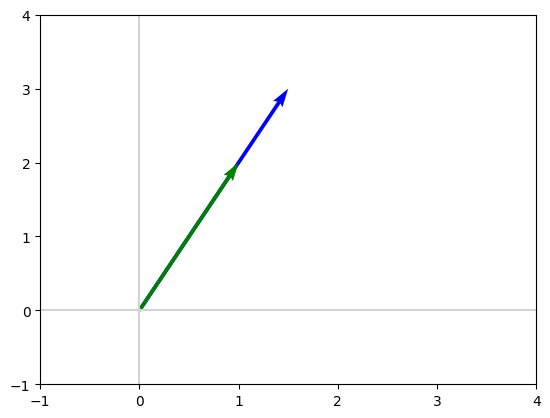

In [64]:
plot_vectors([np.array([1.5,3]),np.array([1,2])],['blue','green'])
plt.xlim(-1,4)
plt.ylim(-1,4)

In [65]:
Apt = torch.tensor([[1,2],[1.5,3]])
Apt

tensor([[1.0000, 2.0000],
        [1.5000, 3.0000]])

In [66]:
torch.det(Apt)

tensor(-0.)

In [67]:
#torch.linalg.inv(Apt) #singular matrix since the columns are lniearly dependant

In [68]:
A = np.array([[1,2,4],[2,-1,3],[0,5,1]])
A

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [69]:
np.linalg.det(A)

19.999999999999996

#**Determinants and Eigenvalues**

##Determinant of a matrix is product of all eignevalues of that matrix

In [70]:
L,V=torch.linalg.eig(Apt)
L.real

tensor([0., 4.])

In [71]:
L,V = np.linalg.eig(A)
L

array([-3.25599251, -1.13863631,  5.39462882])

In [72]:
np.product(L)

19.99999999999999

##Lets use a mtrix B, basis vectors to explore the impact of applying matrices with varying dets.

In [73]:
B = np.array([[1,0],[0,1]])
B

array([[1, 0],
       [0, 1]])

In [74]:
def vectorfy(matrx,cols):
  return np.array(matrx[:,cols]).reshape(-1)

In [75]:
vectorfy(B,0)

array([1, 0])

(-1.0, 2.0)

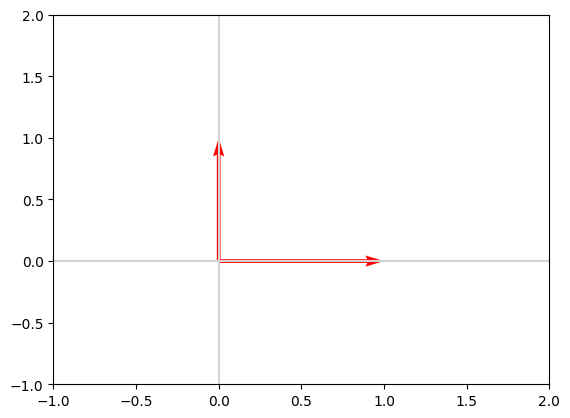

In [76]:
plot_vectors([vectorfy(B,0),vectorfy(B,1)],['red','red'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [77]:
# lets start applying matrices to B

A = np.array([[-4,1],[-8,2]])


In [78]:
np.linalg.det(A)

0.0

In [79]:
NB = np.dot(A,B)
NB

array([[-4,  1],
       [-8,  2]])

(-9.0, 3.0)

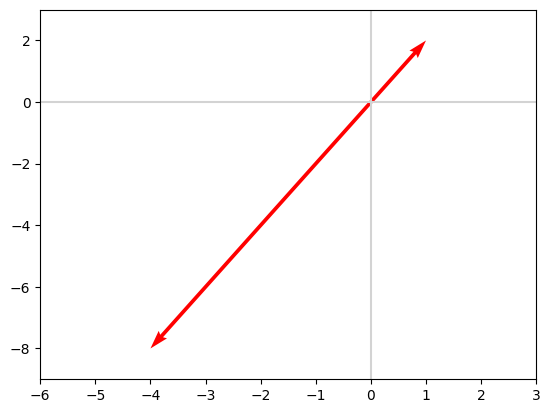

In [80]:
plot_vectors([vectorfy(NB,0),vectorfy(NB,1)],['red','red'])
plt.xlim(-6,3)
plt.ylim(-9,3)

##Since the both vectors are exactly opposite, the dont make yp the volume

In [81]:
L,V = np.linalg.eig(NB)
L,V

(array([-2.,  0.]),
 array([[-0.4472136 , -0.24253563],
        [-0.89442719, -0.9701425 ]]))

##if anyone of the matrix eigenvalue is zero, then the prodcut of the eigenvalues must be zero and the determinant must also be zero

In [82]:
np.linalg.det(NB)

0.0

##Lets apply I2 to B

In [83]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [84]:
IB = np.dot(I,B)

In [85]:
IB

array([[1, 0],
       [0, 1]])

In [86]:
J = np.array([[-0.5,0],[0,2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [87]:
JB = np.dot(J,B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [88]:
L,V = np.linalg.eig(JB)
L,V

(array([-0.5,  2. ]),
 array([[1., 0.],
        [0., 1.]]))

In [89]:
np.product(L)

-1.0

In [90]:
np.linalg.det(JB)

-1.0

(-1.0, 2.0)

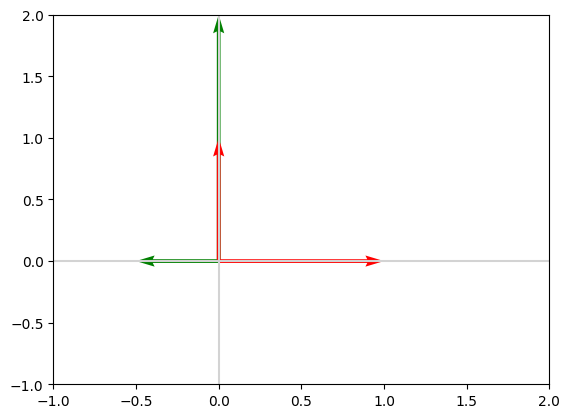

In [91]:
plot_vectors([vectorfy(JB,0),vectorfy(JB,1),vectorfy(B,0),vectorfy(B,1)],['green','green','red','red'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [92]:
D = I*2

In [93]:
D

array([[2, 0],
       [0, 2]])

In [94]:
DB = np.dot(D,B)
DB

array([[2, 0],
       [0, 2]])

(-1.0, 3.0)

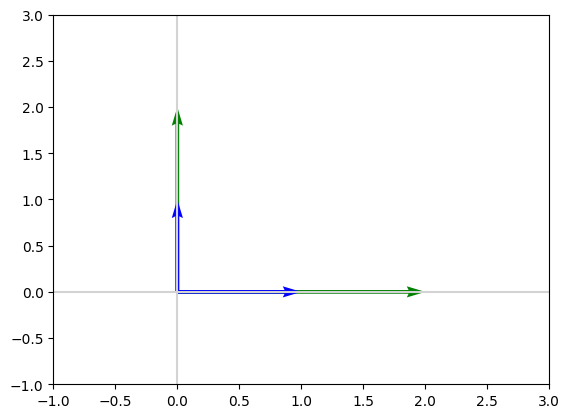

In [95]:
plot_vectors([vectorfy(DB,0),vectorfy(DB,1),vectorfy(B,0),vectorfy(B,1)],['green','green','blue','blue'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [96]:
np.linalg.eig(DB)

(array([2., 2.]),
 array([[1., 0.],
        [0., 1.]]))

##**Eigen Decompostion**
##The eigne decomposition of matrix A is :     A = V .^. Vinv
##where:
* V is the concatination of all eigenvectors of A
* uppr case lambda .^. is the diagonal matrix diag(lambda). Note that the convention is to arrange the lambda values in descending order; as a reult
the first eigenvalue (and its associated eigenvector) may be a primary characteristics of A

In [97]:
A = np.array([[4,2],[-5,-3]])
A

array([[ 4,  2],
       [-5, -3]])

In [98]:
L,V = np.linalg.eig(A)


In [99]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [100]:
L

array([ 2., -1.])

In [101]:
lambd = np.diag(L)
lambd

array([[ 2.,  0.],
       [ 0., -1.]])

In [102]:
np.dot(V,np.dot(lambd,Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

In [103]:
A

array([[ 4,  2],
       [-5, -3]])

## Eigen Decomposition is not possible with all matrices, and in some cases where it is possible, the eigen decomposition involves complex numbers instead of straightforward real numbers.

##In machine learning,however, we are orking with real symmetric metrics, which can be conviniently and efficiently decpmosed to real-only eigenvectors adn real-only eigenvalues.

##A = Q.^. Qinv
## where Q is analogous to V perviously, but its special because its orthogonal matrix

In [104]:
A= np.array([[2,1],[1,2]])
A

array([[2, 1],
       [1, 2]])

In [105]:
L,Q = np.linalg.eig(A)

In [106]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [107]:
np.dot(Q[:,0],Q[:,1])

0.0

In [108]:
L

array([3., 1.])

In [109]:
lamb = np.diag(L)
lamb

array([[3., 0.],
       [0., 1.]])

In [110]:
np.dot(Q,np.dot(lamb,Q.T))

array([[2., 1.],
       [1., 2.]])

In [111]:
np.dot(Q,Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

In [112]:
np.dot(Q.T,Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

###Pytorch implem.

In [113]:
P = torch.tensor([[25,2,-5],[3,-2,1],[5,7,4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [114]:
L,V = torch.linalg.eig(P)
L = L.real
V = V.real
L,V

(tensor([23.7644,  6.6684, -3.4328]),
 tensor([[ 0.9511, -0.2386,  0.1626],
         [ 0.1218, -0.1924, -0.7705],
         [ 0.2837, -0.9519,  0.6163]]))

In [115]:
Lambda = torch.diag(L)
Lambda

tensor([[23.7644,  0.0000,  0.0000],
        [ 0.0000,  6.6684,  0.0000],
        [ 0.0000,  0.0000, -3.4328]])

In [116]:
Vinv = torch.linalg.inv(V)

In [117]:
np.dot(V,np.dot(Lambda,Vinv))

array([[24.999987 ,  1.9999963, -4.9999986],
       [ 2.9999986, -1.9999996,  1.0000005],
       [ 4.999998 ,  7.0000014,  4.000001 ]], dtype=float32)

#**Matrix Operations for ML**

##**Singular Value decomposition**
### the SVD of A= UDV.T

where
* U is an orthogonal matrix m x n, its columns are left singular vectors of A.
* D is a diagonal matrix m x n, its elements along diagonal are singular values of A.
* V is an orthogonal matrix nxn, where its columns are the right singular vectors of A.

In [118]:
A = np.array([[-1,2],[3,-2],[5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [119]:
U,d,VT = np.linalg.svd(A)    #V is already transposed
U,d,VT

(array([[ 0.12708324,  0.47409506,  0.87125411],
        [ 0.00164602, -0.87847553,  0.47778451],
        [ 0.99189069, -0.0592843 , -0.11241989]]),
 array([8.66918448, 4.10429538]),
 array([[ 0.55798885,  0.82984845],
        [-0.82984845,  0.55798885]]))

In [120]:
U   #left singular vectors

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [121]:
d  #diagonal values?

array([8.66918448, 4.10429538])

In [122]:
VT  #right singu;ar vectors. row wise

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [123]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

##But in order to perform UDVT, matrix mult, D must be of equal shape as of A,
##so we concatenate [[0,0]]




In [124]:
D = np.concatenate((D,[[0,0]]),axis=0)  #[[0,0]] is to be passed bcz it is being concat with a matrix
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [125]:
np.dot(U,np.dot(D,VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

In [126]:
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

## SVD and eigen decomposition are closel related to each other:
### * left singular vectors of A = eigenvectors of AA.T
### * right singular vectors of A = eigenvectors of A.tA
### * non zero singular values of A = square roots of eigenvectors of ATA,AAT

#**Exercise**
##proving the above 3 equations

In [127]:
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [128]:
U,d,VT = torch.linalg.svd(P)

In [129]:
U

tensor([[-0.9757,  0.1823,  0.1214],
        [-0.0975,  0.1350, -0.9860],
        [-0.1961, -0.9739, -0.1140]])

In [130]:
D = torch.diag(d)
D

tensor([[26.1632,  0.0000,  0.0000],
        [ 0.0000,  8.1875,  0.0000],
        [ 0.0000,  0.0000,  2.5395]])

In [131]:
VT

tensor([[-0.9810, -0.1196,  0.1528],
        [ 0.0113, -0.8211, -0.5706],
        [-0.1937,  0.5581, -0.8069]])

In [132]:
AAT = torch.matmul(P,P.T)
AAT

tensor([[654.,  66., 119.],
        [ 66.,  14.,   5.],
        [119.,   5.,  90.]])

In [133]:
L1,V1 = torch.linalg.eig(AAT)

In [134]:
L1=L1.real
V1 = V1.real
L1,V1

(tensor([684.5149,  67.0359,   6.4492]),
 tensor([[ 0.9757,  0.1823,  0.1214],
         [ 0.0975,  0.1350, -0.9860],
         [ 0.1961, -0.9739, -0.1140]]))

In [135]:
U,V1

(tensor([[-0.9757,  0.1823,  0.1214],
         [-0.0975,  0.1350, -0.9860],
         [-0.1961, -0.9739, -0.1140]]),
 tensor([[ 0.9757,  0.1823,  0.1214],
         [ 0.0975,  0.1350, -0.9860],
         [ 0.1961, -0.9739, -0.1140]]))

In [136]:
ATA = torch.matmul(P.T,P)
ATA

tensor([[ 659.,   79., -102.],
        [  79.,   57.,   16.],
        [-102.,   16.,   42.]])

In [137]:
L2,V2 = torch.linalg.eig(ATA)
L2 = L2.real
V2 = V2.real


In [138]:
VT,V2

(tensor([[-0.9810, -0.1196,  0.1528],
         [ 0.0113, -0.8211, -0.5706],
         [-0.1937,  0.5581, -0.8069]]),
 tensor([[ 0.9810,  0.1937, -0.0113],
         [ 0.1196, -0.5581,  0.8211],
         [-0.1528,  0.8069,  0.5706]]))

#**Image compression via SVD**

In [139]:
from PIL import Image

In [140]:
img = Image.open('/content/WhatsApp Image 2024-01-07 at 7.37.13 PM.jpeg')

In [177]:
img.size

(1200, 1600)

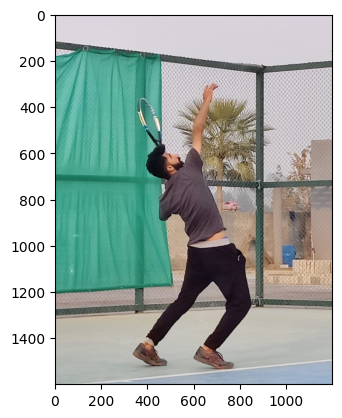

In [146]:
_ = plt.imshow(img)

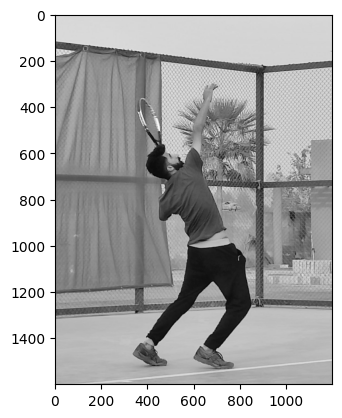

In [147]:
imgrey = img.convert('LA')
_ = plt.imshow(imgrey)

##Convert image into numpy matrix which will not affect the image data

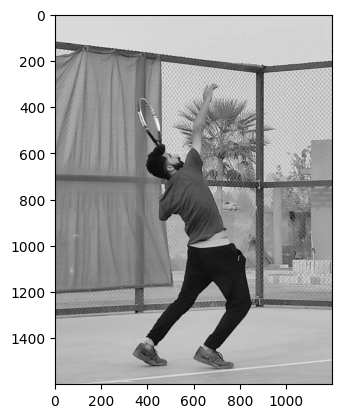

In [159]:
imgmat=np.array(list(imgrey.getdata(band=0)),float)
imgmat.shape = (imgrey.size[1],imgrey.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat,cmap='gray')

##Calculate the SVD of image

In [174]:
imgmat.shape

(1600, 1200)

In [160]:
U,d,VT = np.linalg.svd(imgmat)
U,d,VT

(matrix([[-0.03453765,  0.0186498 ,  0.00956379, ..., -0.03567299,
          -0.02439523,  0.02174034],
         [-0.03453188,  0.01864357,  0.00958762, ...,  0.04185748,
          -0.0408355 , -0.02530026],
         [-0.03452967,  0.01865342,  0.00959841, ..., -0.17200093,
          -0.0021774 ,  0.00549507],
         ...,
         [-0.02838604,  0.01470856,  0.00810732, ...,  0.28654193,
          -0.08288443,  0.01143784],
         [-0.02825862,  0.01545092,  0.00761703, ..., -0.10784153,
           0.32601592, -0.13597004],
         [-0.02814912,  0.01596566,  0.00725731, ...,  0.01802182,
          -0.14536394,  0.18725943]]),
 array([2.13952088e+05, 2.39100152e+04, 1.96423070e+04, ...,
        1.64082540e+00, 1.58772519e+00, 1.56325943e+00]),
 matrix([[-2.81704354e-02, -2.81705752e-02, -2.81593992e-02, ...,
          -3.27263749e-02, -3.26690553e-02, -3.27156862e-02],
         [-1.37042858e-02, -1.39125762e-02, -1.41558687e-02, ...,
          -1.63536442e-02, -1.56456863e-02, -1.

## As eigenvalues are arranged in descending order in diag(d), so too are the  singular values, by convention, arranged in descending order in D(or in diag(d)),. Thus the first left singular vector of U, and the first right singular vector of V may represent the most prominent features of your image.

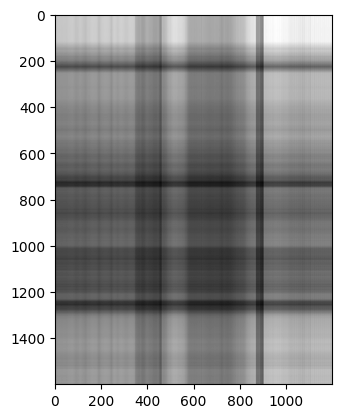

In [163]:
reconstimg = np.matrix(U[:,0]) * np.diag(d[:1]) * np.matrix(VT[0,:])
_ = plt.imshow(reconstimg,cmap='gray')

##Adding more singular vectors improves the quality of image?

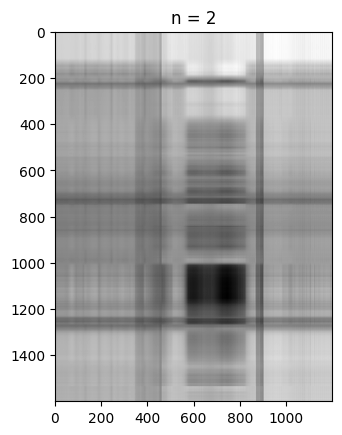

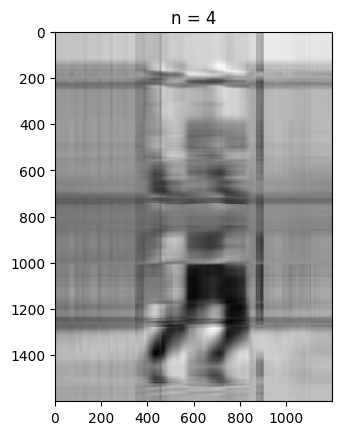

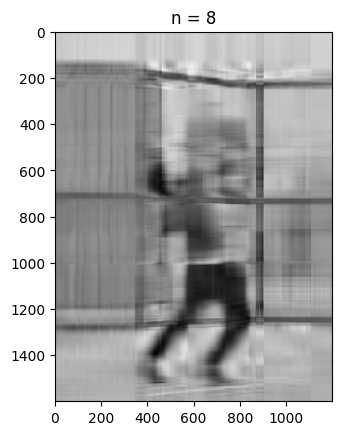

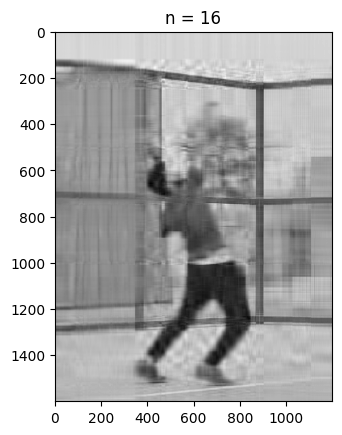

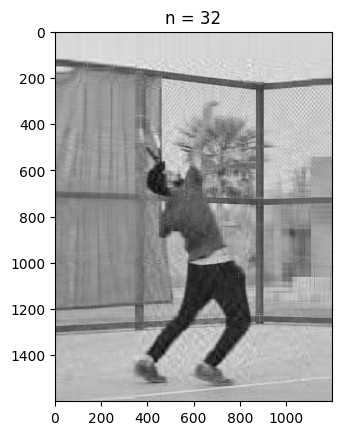

In [165]:
for i in [2,4,8,16,32]:
  recon = np.matrix(U[:,:i]) * np.diag(d[:i]) * np.matrix(VT[:i,:])
  plt.imshow(recon,cmap='gray')
  title="n = %s" % i
  plt.title(title)
  plt.show()

## With 32 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image

In [168]:
imgmat.shape

(1600, 1200)

In [169]:
full = 1600 * 1200
full

1920000

In [171]:
svd_size = 32*1600 + 32 + 32*1200
svd_size

89632

In [173]:
svd_size/full

0.046683333333333334

## Specifically, the image represented as 32 singular vectors is 4.7% of the original image!
## Alingside images, we can use singular vectors for dramatic, lossy compression of other types of media files.